In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [4]:
#memasukan file
df_p= pd.read_csv(r'c:\Users\msi test\Downloads\folder tugas ke2\heart_disease_uci.csv')
df_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [5]:
#Mencari Nilai Yang Hilang
missing_values = df_p.isnull().sum()
print(missing_values)

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64


In [6]:
#memeriksa outliers dengan IQR
numerical_columns = df_p.select_dtypes(include=['float64', 'int64']).columns
outliers = {}
for col in numerical_columns:
    Q1 = df_p[col].quantile(0.25)
    Q3 = df_p[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers[col] = df_p[(df_p[col] < lower_bound) | (df_p[col] > upper_bound)][col].count()
print(outliers)

{'id': 0, 'age': 0, 'trestbps': 28, 'chol': 183, 'thalch': 2, 'oldpeak': 16, 'ca': 20, 'num': 0}


In [7]:
#check mean,median,std,skew,kurt
desc_stats = df_p[numerical_columns].agg(['mean', 'median', 'std', 'var', 'skew', 'kurt'])
mode_values = df_p[numerical_columns].mode().iloc[0]  # mengambil mode pertama
print(desc_stats)
print('Mode:', mode_values)

                  id        age    trestbps          chol      thalch  \
mean      460.500000  53.510870  132.132404    199.130337  137.545665   
median    460.500000  54.000000  130.000000    223.000000  140.000000   
std       265.725422   9.424685   19.066070    110.780810   25.926276   
var     70610.000000  88.824691  363.515007  12272.387943  672.171813   
skew        0.000000  -0.195994    0.213334     -0.613836   -0.211119   
kurt       -1.200000  -0.382930    2.958664      0.062273   -0.479725   

         oldpeak        ca       num  
mean    0.878788  0.676375  0.995652  
median  0.500000  0.000000  1.000000  
std     1.091226  0.935653  1.142693  
var     1.190775  0.875447  1.305748  
skew    1.041427  1.165978  0.968880  
kurt    1.127069  0.199498 -0.104325  
Mode: id            1.0
age          54.0
trestbps    120.0
chol          0.0
thalch      150.0
oldpeak       0.0
ca            0.0
num           0.0
Name: 0, dtype: float64


In [12]:
import pandas as pd
import numpy as np  # pastikan numpy di import

# Baca dataset dari file CSV
df_p = pd.read_csv(r'c:\Users\msi test\Downloads\folder tugas ke2\heart_disease_uci.csv')

# Daftar kolom numerik yang akan digunakan untuk menghitung korelasi
numeric_columns = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'num']

# Hitung matriks korelasi
correlation_matrix = df_p[numeric_columns].corr()

# Hilangkan diagonal (nilai korelasi diri sendiri) dari matriks korelasi
correlation_matrix_no_diag = correlation_matrix.where(~np.eye(correlation_matrix.shape[0], dtype=bool))

# Temukan nilai korelasi tertinggi (dalam hal absolut) dari pasangan variabel
max_corr = correlation_matrix_no_diag.abs().max().max()

# Temukan pasangan variabel dengan korelasi tertinggi
highest_corr_pair = correlation_matrix_no_diag.abs().stack().idxmax()

# Cetak hasilnya
print("Pasangan variabel dengan korelasi tertinggi:", highest_corr_pair)
print("Nilai korelasi tertinggi:", max_corr)

Pasangan variabel dengan korelasi tertinggi: ('ca', 'num')
Nilai korelasi tertinggi: 0.5162163234345344


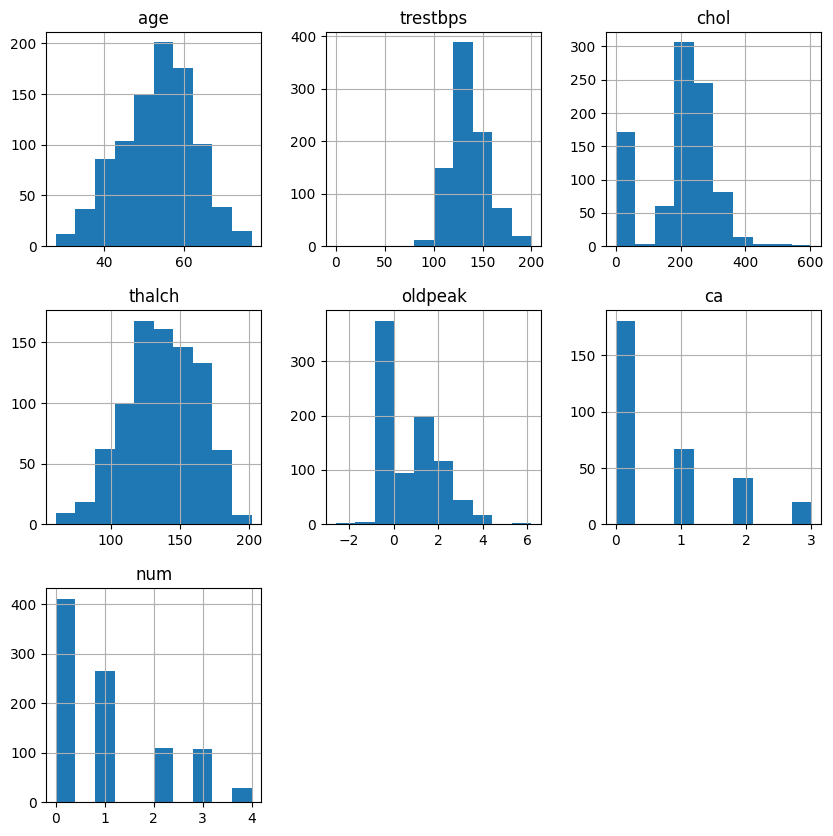

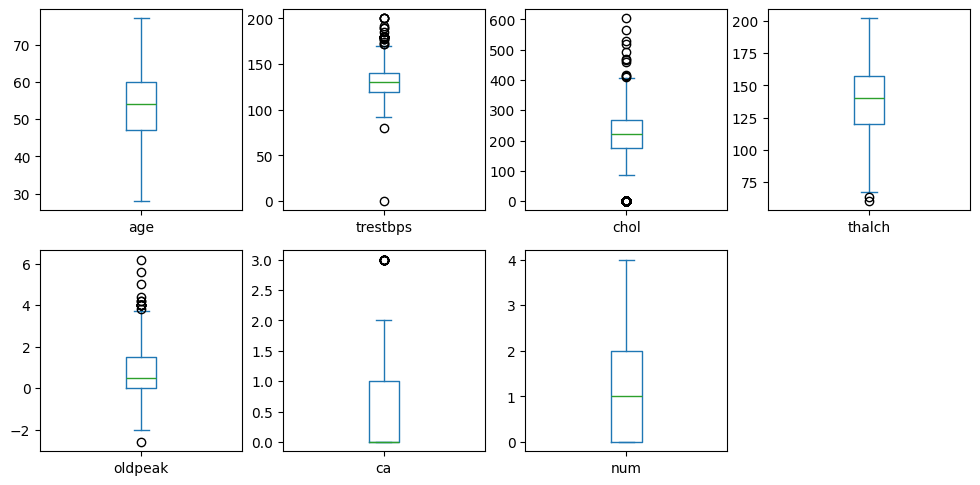

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Daftar kolom numerik (sesuaikan dengan kolom numerik di dataset Anda)
numerical_columns = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'num']

# Plot histogram untuk setiap kolom numerik
df_p[numerical_columns].hist(figsize=(10, 10))
plt.show()

# Plot boxplot untuk setiap kolom numerik
df_p[numerical_columns].plot(kind='box', subplots=True, layout=(4, 4), figsize=(12, 12))
plt.show()

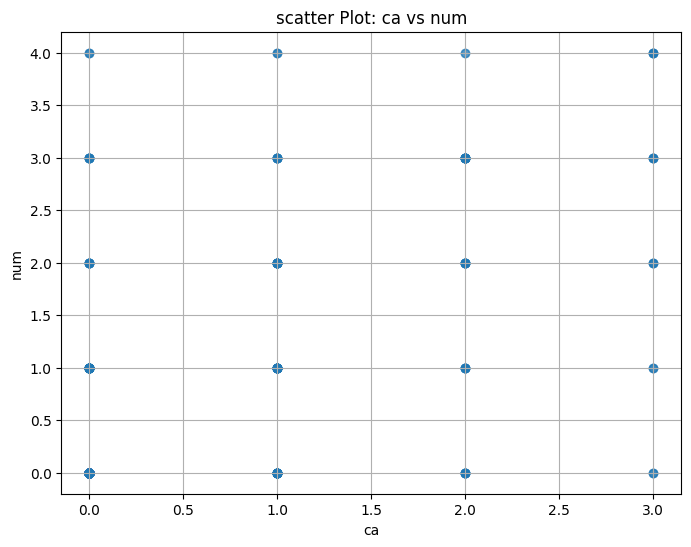

In [160]:
plt.figure(figsize=(8, 6))
plt.scatter(df_p[highest_corr_pair[0]], df_p[highest_corr_pair[1]], alpha=0.5)
plt.title(f'scatter Plot: {highest_corr_pair[0]} vs {highest_corr_pair[1]}')
plt.xlabel(highest_corr_pair[0])
plt.ylabel(highest_corr_pair[1])
plt.grid(True)
plt.show()

#laporan praktikum:

dari data ini menunjukkan bahwa distribusi beberapa variabel tidak mengikuti pola. normal variabel kolesterol dan tekanan darah saat istirahat memiliki skewness (kemiringan distribusi data) negatif. Selain itu, variabel seperti ca dan thal kekurangan nilai yang cukup signifikan. penanganan lebih lanjut diperlukan sebelum melanjutkan analisis. Dataset ini menunjukkan korelasi tertinggi antara variabel ca (jumlah pembuluh darah utama yang terkena pewarnaan) dan num, dengan nilai korelasi 0,516. Hal ini menunjukkan bahwa kedua variabel tersebut sangat terkait satu sama lain. Selain itu, ditemukan bahwa beberapa variabel, seperti oldpeak, memiliki outliers. Ini menunjukkan bahwa kita perlu memperhatikan lebih banyak untuk mencegah potensi bias pada hasil analisis.

